In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')

C:\Users\fafzali\AppData\Local\Temp\ipykernel_33860\4102998519.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# Define the "Custom Peaks" function
def custom_peaks(x, y):
    # Expand to a 2D mesh
    x, y = np.meshgrid(x, y)
    
    z = 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) \
        - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) \
        - 1 / 3 * np.exp(-(x + 1) ** 2 - y ** 2)
    return z


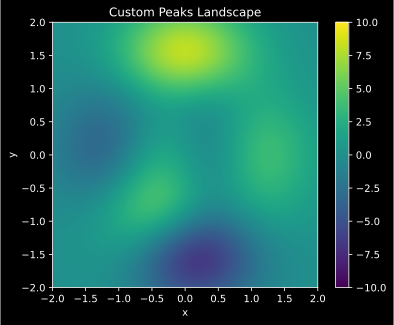

In [3]:
# Create the "Custom Peaks" landscape
x_values = np.linspace(-2, 2, 201)
y_values = np.linspace(-2, 2, 201)

# Change the landscape example
Z = custom_peaks(x_values, y_values)

# Visualize the "Custom Peaks" landscape
plt.imshow(Z, extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], 
           vmin=-10, vmax=10, origin='lower')  # Adjust vmin and vmax
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Peaks Landscape')
plt.colorbar()
plt.show()


In [4]:
import sympy as sym

sx, sy = sym.symbols('sx, sy')

sZ = 3 * (1 - sx) ** 2 * sym.exp(-(sx ** 2) - (sy + 1) ** 2) \
    - 10 * (sx / 5 - sx ** 3 - sy ** 5) * sym.exp(-sx ** 2 - sy ** 2) \
    - 1 / 3 * sym.exp(-(sx + 1) ** 2 - sy ** 2)

# Create functions from the SymPy-computed derivatives
custom_df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'numpy')
custom_df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'numpy')


In [7]:
# Random starting point (uniform between -2 and +2)
custom_local_minima = np.random.rand(2) * 4 - 2
custom_start_point = custom_local_minima.copy()

# Learning parameters
learning_rate = 0.01
training_epochs = 1000

# Run through training and record trajectory
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([custom_df_x(custom_local_minima[0], custom_local_minima[1]), 
                     custom_df_y(custom_local_minima[0], custom_local_minima[1])])
    custom_local_minima = custom_local_minima - learning_rate * grad
    trajectory[i, :] = custom_local_minima

print("Custom Local Minimum:", custom_local_minima)
print("Custom Start Point:", custom_start_point)


Custom Local Minimum: [ 0.22827892 -1.62553496]
Custom Start Point: [ 0.54551239 -1.09680823]


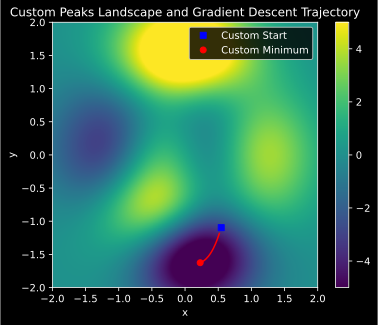

In [8]:
# Visualize the "Custom Peaks" landscape and trajectory
plt.imshow(Z, extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], 
           vmin=-5, vmax=5, origin='lower')
plt.plot(custom_start_point[0], custom_start_point[1], 'bs', label='Custom Start')
plt.plot(custom_local_minima[0], custom_local_minima[1], 'ro', label='Custom Minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Peaks Landscape and Gradient Descent Trajectory')
plt.legend()
plt.colorbar()
plt.show()


1. **Initial Guess Modification**
   - Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?

2. **Epochs Adjustment**
   - Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from using 1000 epochs?

3. **Learning Rate Experimentation**
   - (Again with the same starting location) Change the learning rate to 0.1 (1000 epochs). What do you notice about the trajectory? Try again with the learning rate set to 0.5, and then to 0.00001.


In [ ]:
# Define the "Custom Peaks" function
def custom_peaks(x, y):
    # Expand to a 2D mesh
    x, y = np.meshgrid(x, y)
    
    z = 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) \
        - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2) \
        - 1 / 3 * np.exp(-(x + 1) ** 2 - y ** 2)
    return z

# Create the "Custom Peaks" landscape
x_values = np.linspace(-2, 2, 201)
y_values = np.linspace(-2, 2, 201)
Z = custom_peaks(x_values, y_values)

# Visualize the "Custom Peaks" landscape
plt.imshow(Z, extent=[x_values[0], x_values[-1], y_values[0], y_values[-1]], 
           vmin=-10, vmax=10, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Peaks Landscape')
plt.colorbar()

# Modify the initial guess
custom_local_minima = np.array([0, 1.4])

# Learning parameters
learning_rate = 0.01  # Modify this as per each question
training_epochs = 1000  # Modify this as per each question

# Run through training and record trajectory
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = np.array([custom_df_x(custom_local_minima[0], custom_local_minima[1]), 
                     custom_df_y(custom_local_minima[0], custom_local_minima[1])])
    custom_local_minima = custom_local_minima - learning_rate * grad
    trajectory[i, :] = custom_local_minima

# Plot the trajectory and final solution
plt.plot(custom_local_minima[0], custom_local_minima[1], 'ro', label='Local Minimum')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend()
plt.show()
